In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set()
sns.set_palette('bright')

# Standard plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [2]:
#c = plt.get_cmap('prism')

In [3]:
cases = pd.read_csv('Cases_Time_Series_CAMCAR_All.csv', index_col=0)
deaths = pd.read_csv('Deaths_Time_Series_CAMCAR_All.csv', index_col=0)
recovered = pd.read_csv('Recovered_Time_Series_CAMCAR_All.csv', index_col=0)
active = pd.read_csv('Active_CAMCAR_All.csv', index_col=0) 

In [4]:
gf = pd.read_csv('Growth_Factor_CAMCAR_All.csv', index_col=0)

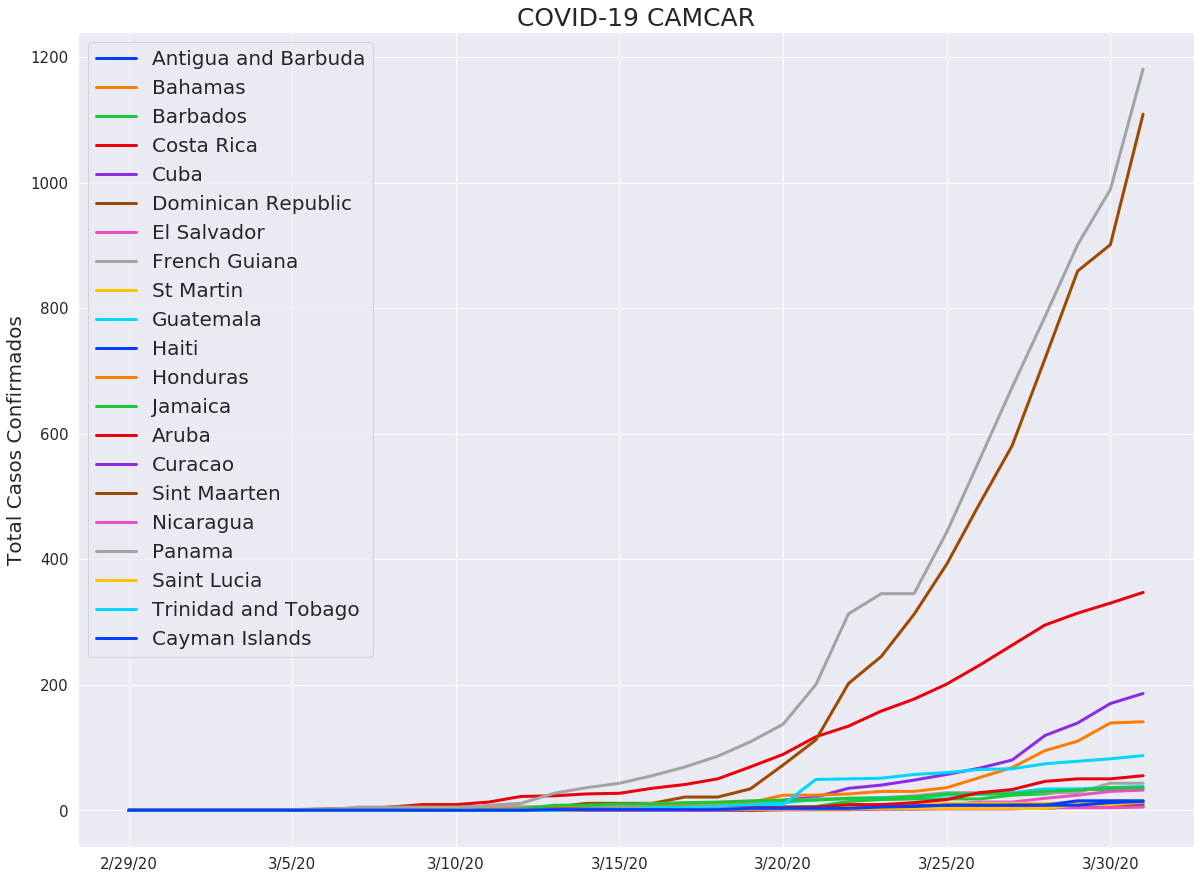

In [5]:
cases.plot(kind='line', linewidth=3)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Total Casos Confirmados', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

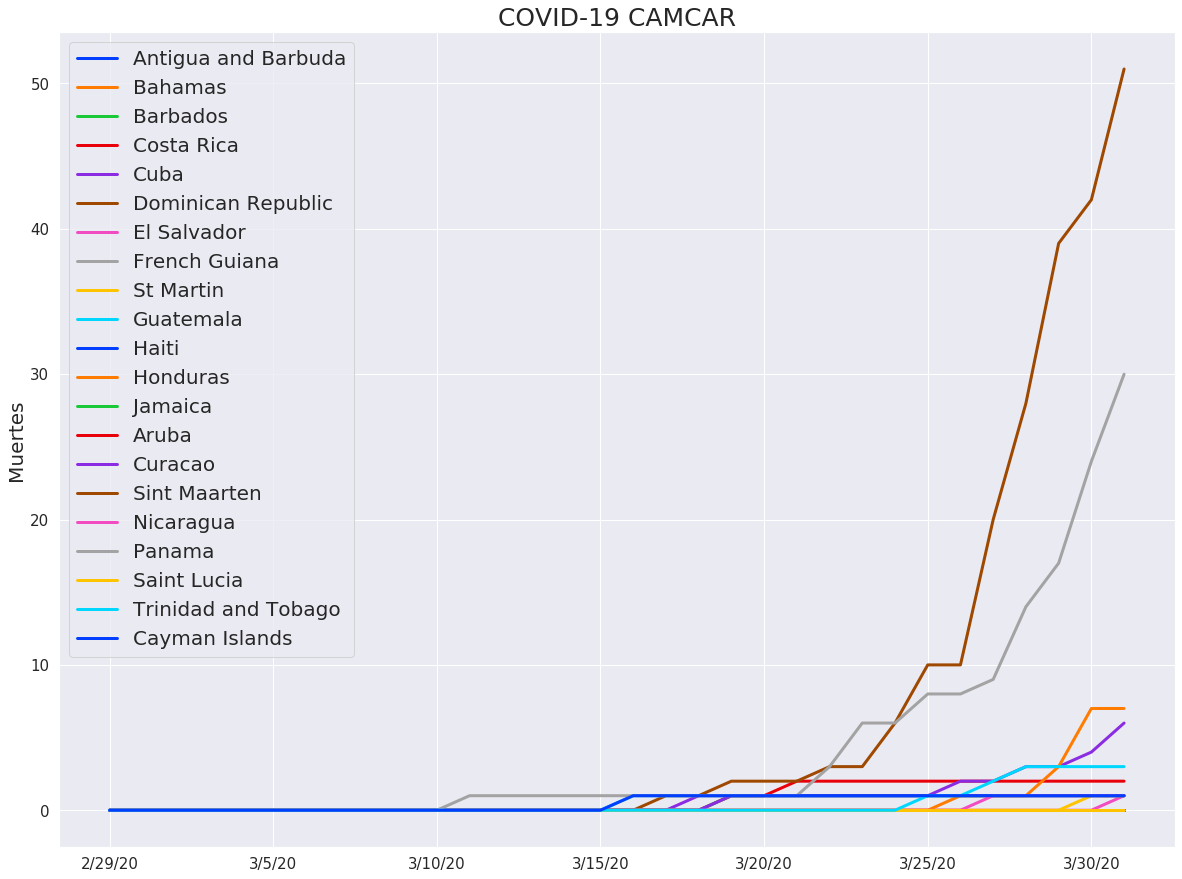

In [6]:
deaths.plot(kind='line', linewidth=3)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Muertes', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

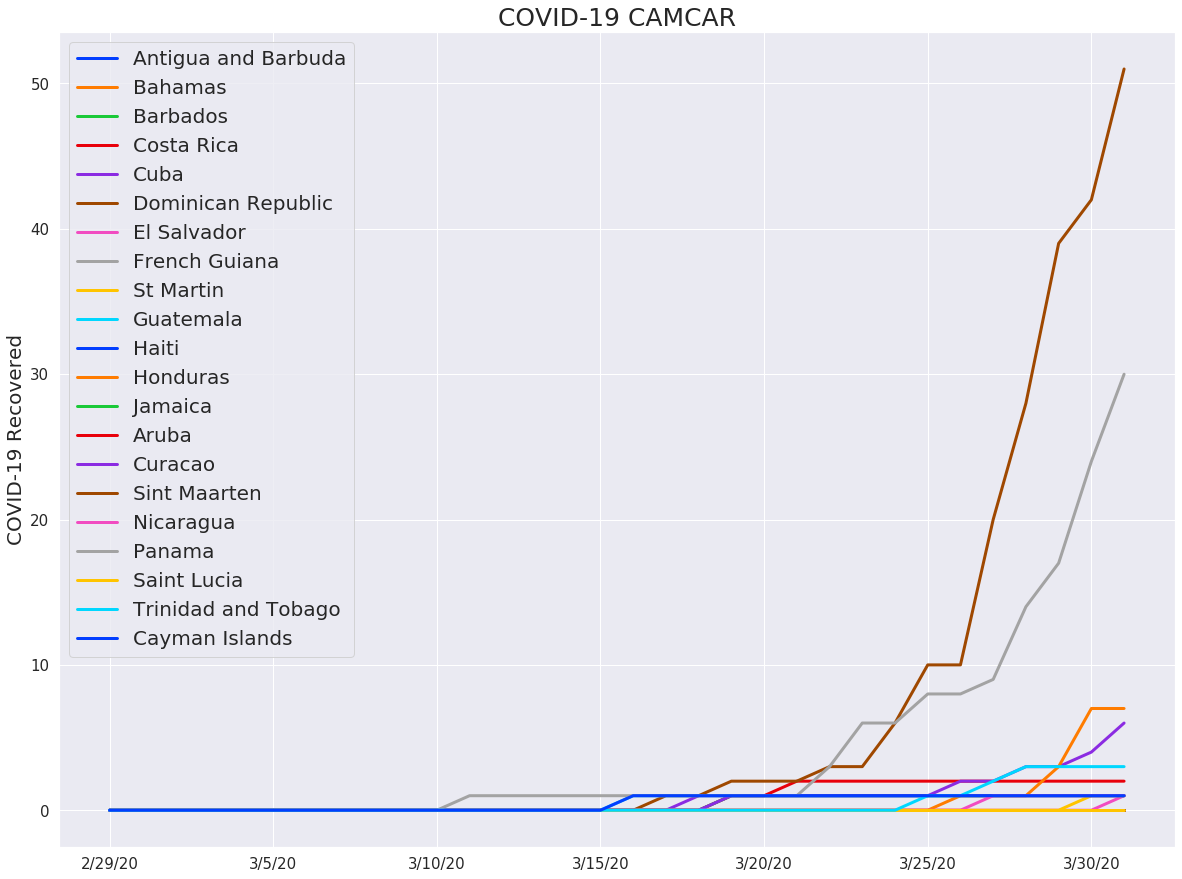

In [7]:
recovered.plot(kind='line', linewidth=3)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('COVID-19 Recovered', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

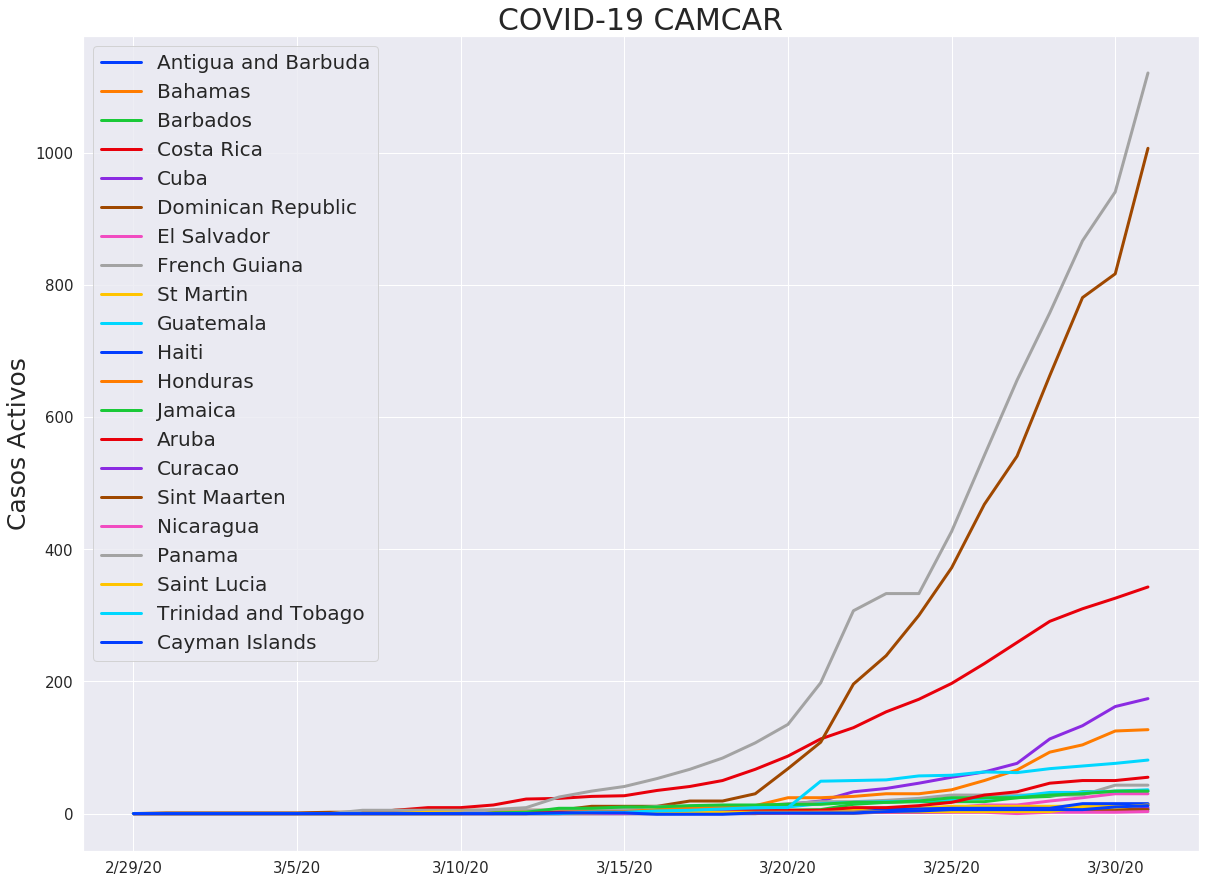

In [8]:
active.plot(kind='line', linewidth=3)
plt.title('COVID-19 CAMCAR', fontsize=30)
plt.ylabel('Casos Activos', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

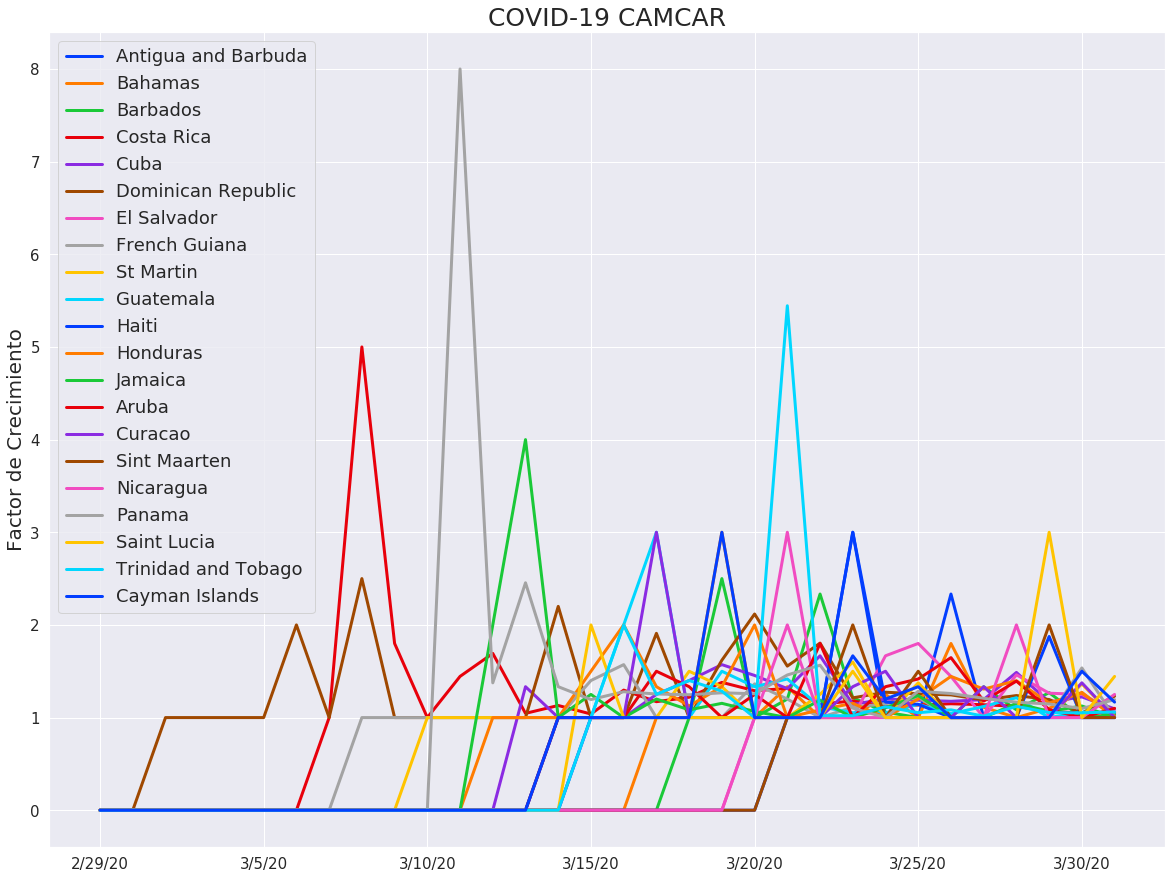

In [9]:
gf.plot(kind='line', linewidth=3)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Factor de Crecimiento', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

In [10]:
new_per_day = cases.diff().dropna()

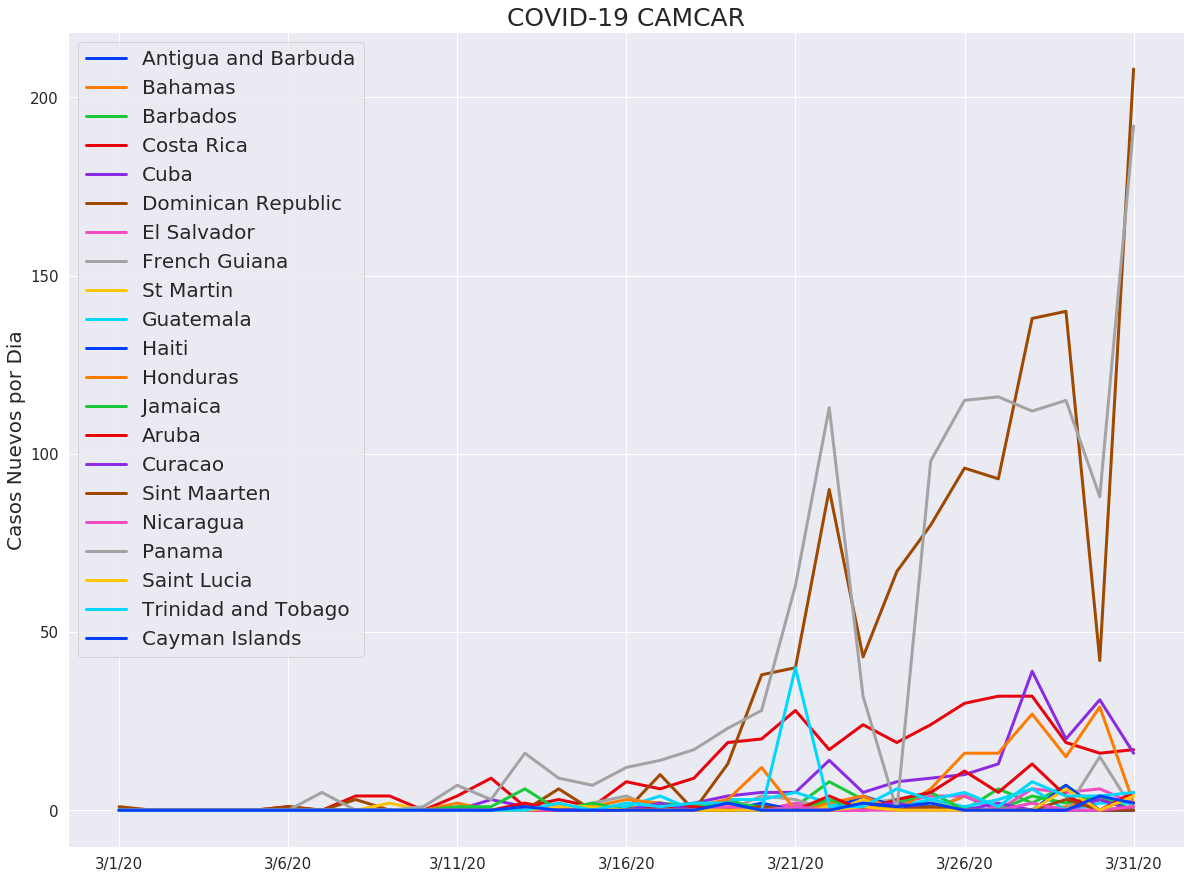

In [11]:
new_per_day.plot(kind='line', linewidth=3)
plt.title('COVID-19 CAMCAR', fontsize=25)
plt.ylabel('Casos Nuevos por Dia', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

In [12]:
def plot_new_v_cum_avg(df, df2, day_window=1):  
    
    df_smoothed = df2.rolling(window=day_window).mean().dropna()
    
    if len(df.shape) > 1:
        cols = df.shape[1]
    else: 
        cols = 0
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,30))
    
    axes[0].set_title('COVID-19 CAMCAR', fontsize=25)
    axes[1].set_xlabel('Total Casos Confirmados', fontsize=20)
    axes[0].set_ylabel('Casos Nuevos (Promedio Sobre ' + str(day_window) + 'Dias)', fontsize=20)
    axes[1].set_ylabel('Casos Nuevos (Promedio Sobre ' + str(day_window) + 'Dias)', fontsize=20)
    axes[0].set_xscale('log', subsx=range(10))
    axes[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axes[0].set_yscale('log')
    axes[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=True))
    for i in range(cols):
        axes[0].plot(df.iloc[day_window:,i], df_smoothed.iloc[:,i], label=df2.iloc[:,i].name, linewidth=5)
        axes[1].plot(df.iloc[day_window:,i], df_smoothed.iloc[:,i], label=df2.iloc[:,i].name, linewidth=5)
    axes[0].legend(loc='best', fontsize=15)
    axes[1].legend(loc='best', fontsize=15)
    

In [13]:
largest = cases.iloc[-1,:] > cases.iloc[-1,:].quantile(0.70)
names_of_largest = [largest.index[i] for i in range(len(largest)) if largest[i] == True]
names_of_largest

['Costa Rica',
 'Cuba',
 'Dominican Republic',
 'Honduras',
 'Panama',
 'Trinidad and Tobago']

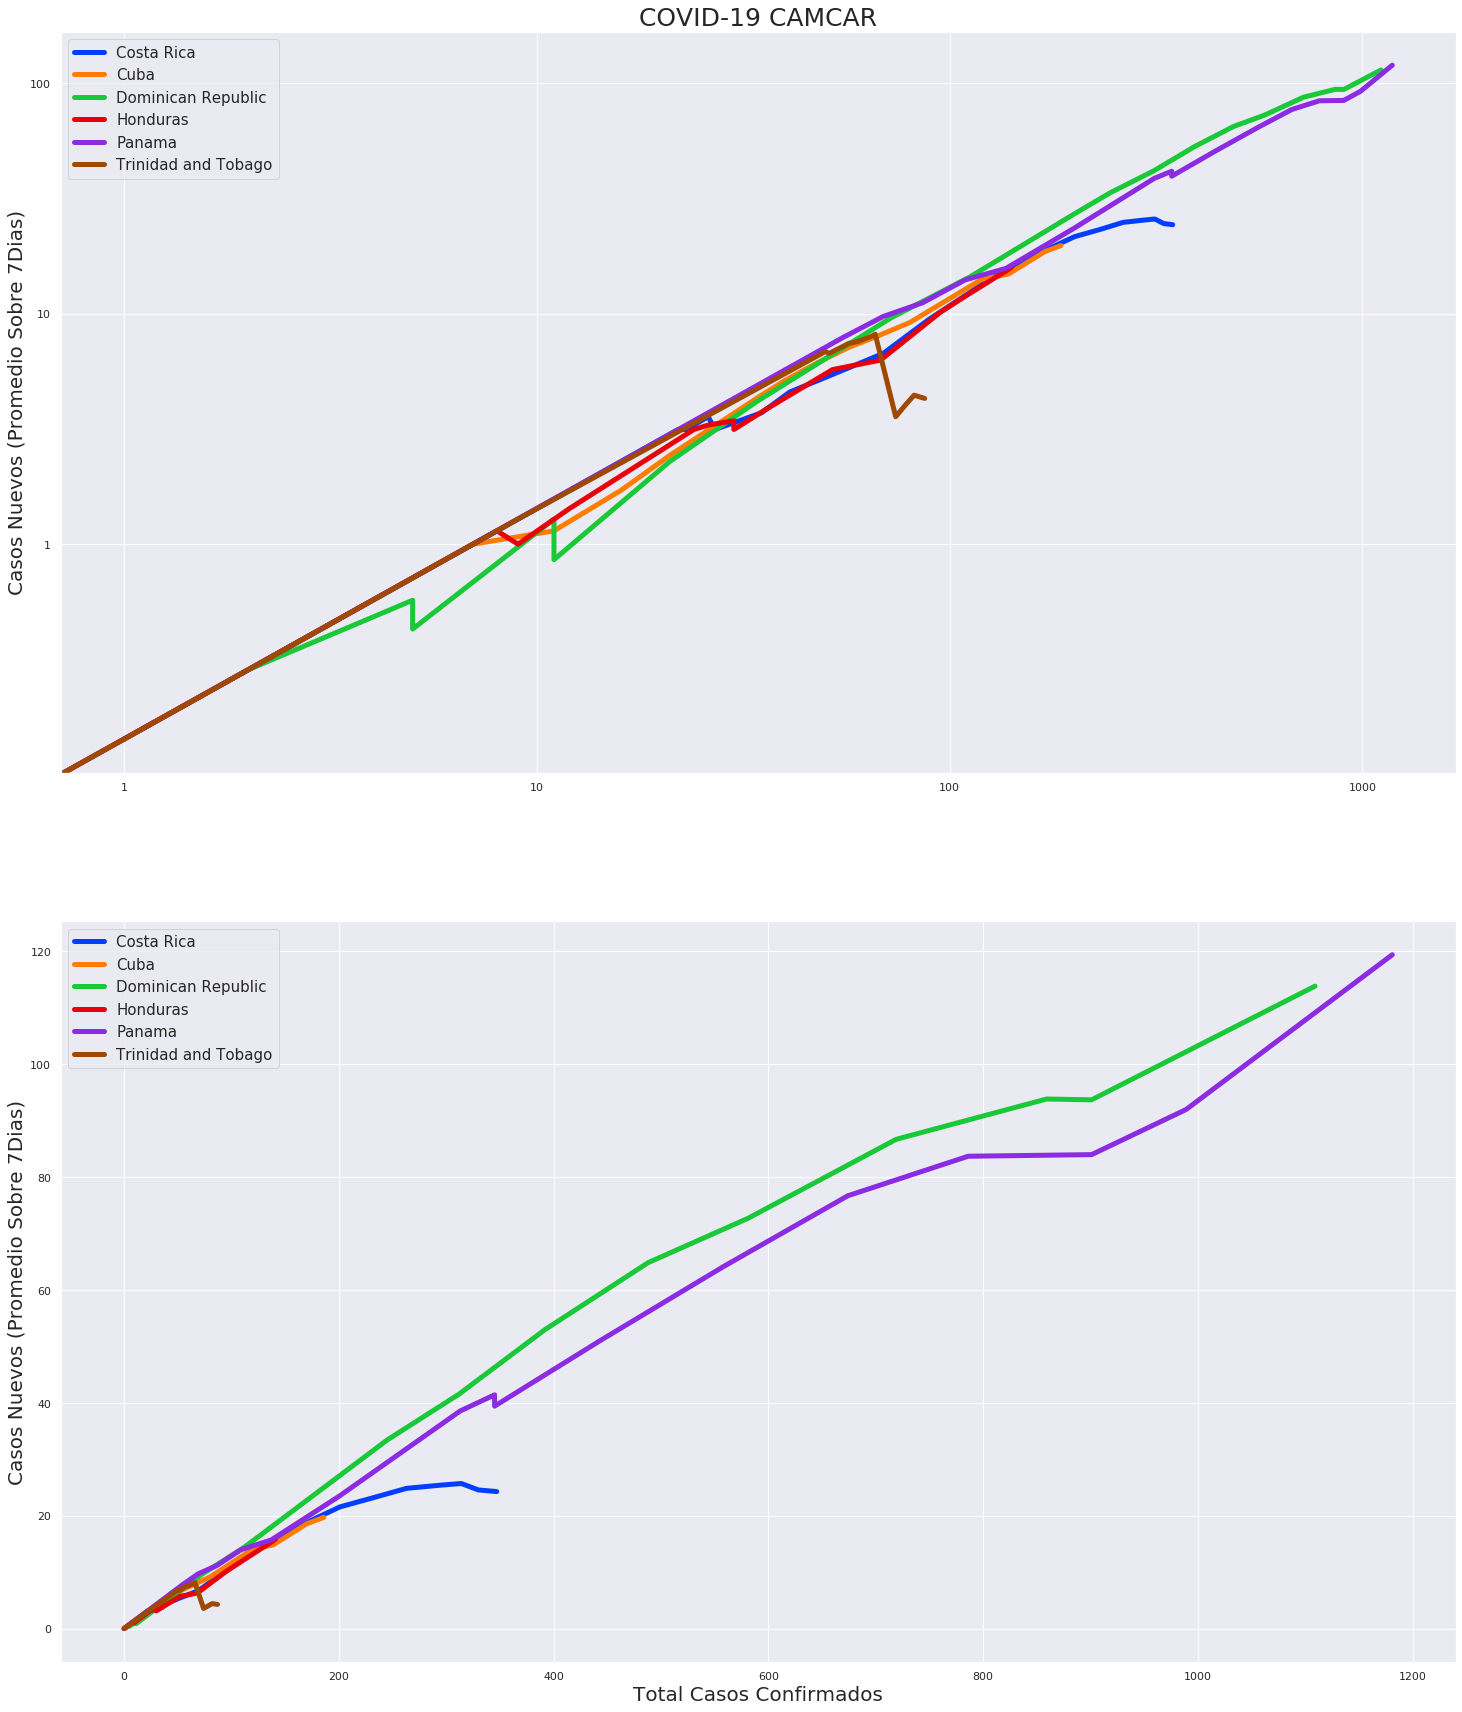

In [14]:
plot_new_v_cum_avg(cases[names_of_largest], new_per_day[names_of_largest], 7)
plt.savefig('/home/andres/Documents/JupyterNBs/COVID_19_Data/Figures/New_Vs_Total_Largest_Only_csv')

In [15]:
def plot_new_v_cum_sum(df, df2, day_window=1):  
    
    df_smoothed = df2.rolling(window=day_window).sum().dropna()
    
    if len(df.shape) > 1:
        cols = df.shape[1]
    else: 
        cols = 0
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,30))
    
    axes[0].set_title('COVID-19 CAMCAR', fontsize=25)
    axes[1].set_xlabel('Total Casos Confirmados', fontsize=20)
    axes[0].set_ylabel('Casos Nuevos (Ultimos ' + str(day_window) + 'Dias)', fontsize=20)
    axes[1].set_ylabel('Casos Nuevos (Ultimos ' + str(day_window) + 'Dias)', fontsize=20)
    axes[0].set_xscale('log', subsx=range(10))
    axes[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axes[0].set_yscale('log')
    axes[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=True))
    for i in range(cols):
        axes[0].plot(df.iloc[day_window:,i], df_smoothed.iloc[:,i], label=df2.iloc[:,i].name, linewidth=5)
        axes[1].plot(df.iloc[day_window:,i], df_smoothed.iloc[:,i], label=df2.iloc[:,i].name, linewidth=5)
    axes[0].legend(loc='best', fontsize=15)
    axes[1].legend(loc='best', fontsize=15)
    

In [16]:
dates = ['3/9/20', '3/15/20', '3/16/20', '3/25/20']

In [17]:
cases_x = cases['Costa Rica'].loc[dates]
cases_x

3/9/20       9
3/15/20     27
3/16/20     35
3/25/20    201
Name: Costa Rica, dtype: int64

In [18]:
labels = ['9 marzo', '15 marzo', '16 marzo', '25 marzo']

In [19]:
new_cases_y = new_per_day['Costa Rica'].rolling(window=7).sum().loc[dates]
new_cases_y

3/9/20       9.0
3/15/20     22.0
3/16/20     26.0
3/25/20    151.0
Name: Costa Rica, dtype: float64

In [20]:
annotations = zip(cases_x, new_cases_y ,labels)
for i,j,k in annotations:
    print(i,j,k)

9 9.0 9 marzo
27 22.0 15 marzo
35 26.0 16 marzo
201 151.0 25 marzo


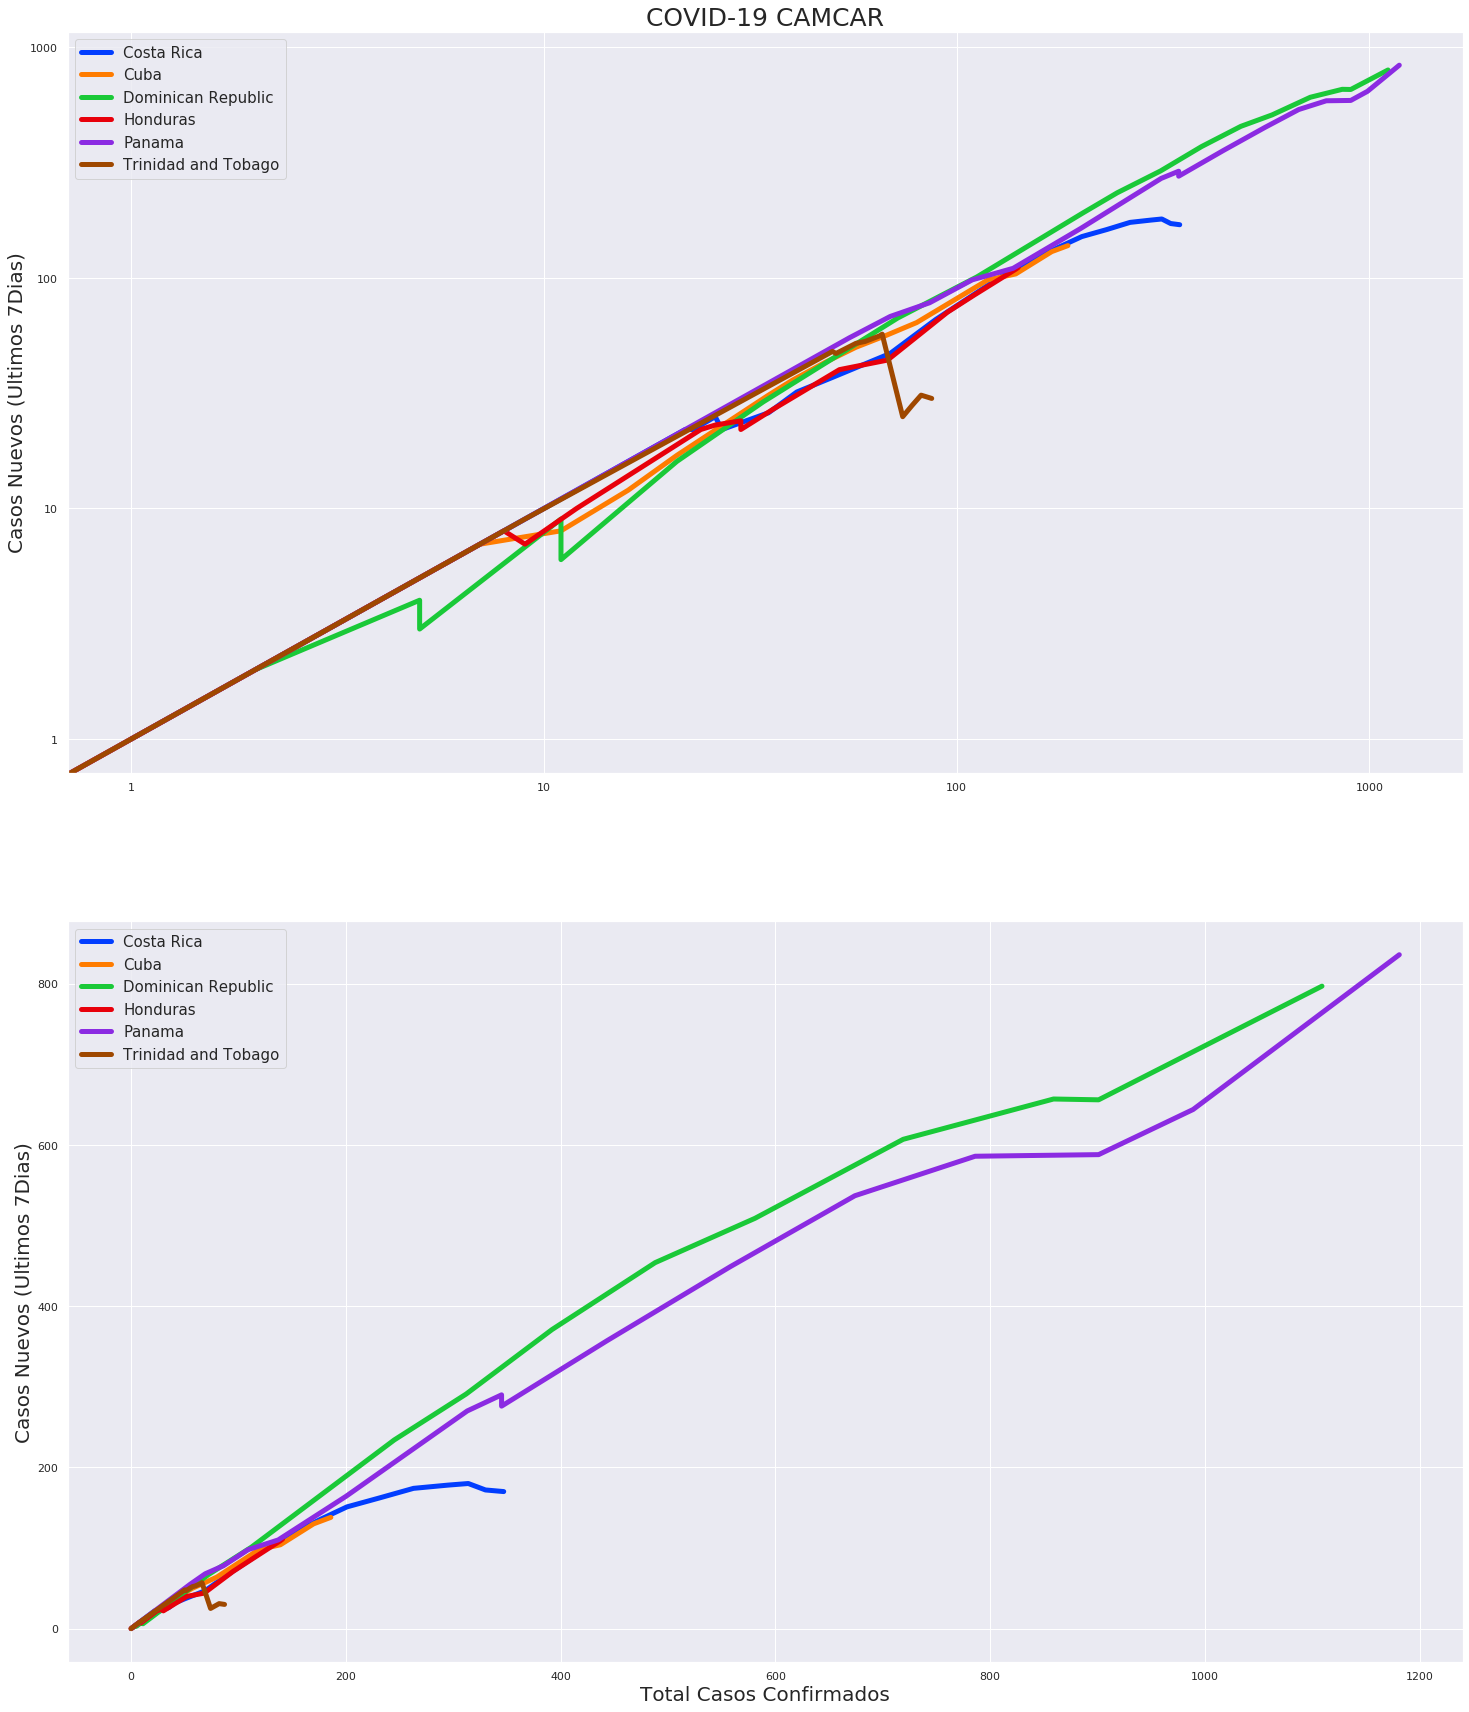

<Figure size 1440x1080 with 0 Axes>

In [24]:
plot_new_v_cum_sum(cases[names_of_largest], new_per_day[names_of_largest], 7)

for x, y, label in annotations:
    axes[0].annotate(
        label, xy=(x, y + 75), xytext=(x, y + 175),
        arrowprops=dict(facecolor='black', headwidth=4, width=2, 
                        headlength=4, horizontalalignment='right',
                       verticalalignment='top')
    )

plt.show()
plt.savefig('/home/andres/Documents/JupyterNBs/COVID_19_Data/Figures/New_Vs_Total_Largest_Only_Sumcsv')

In [22]:
new_per_day['Costa Rica'].rolling(window=7).sum().dropna()

3/7/20       1.0
3/8/20       5.0
3/9/20       9.0
3/10/20      9.0
3/11/20     13.0
3/12/20     22.0
3/13/20     22.0
3/14/20     25.0
3/15/20     22.0
3/16/20     26.0
3/17/20     32.0
3/18/20     37.0
3/19/20     47.0
3/20/20     66.0
3/21/20     91.0
3/22/20    107.0
3/23/20    123.0
3/24/20    136.0
3/25/20    151.0
3/26/20    162.0
3/27/20    174.0
3/28/20    178.0
3/29/20    180.0
3/30/20    172.0
3/31/20    170.0
Name: Costa Rica, dtype: float64